# Arctic Amplification and New York State Temperature Anomalies

Temperature Anomalies using CFSR Data

---

## Overview

Introductory paragraph here ... blah blah AA using CFSR Data, and NYS using NYSM w only 6 years..

1. Section 1: Create Monthly Mean Datasets by Year from 1979-2022 using CFSR Data
2. Section 2: Arctic Amplification Study using CFSR Data
3. Section 3: NY State Temp Anomalies using NY State Mesonet (NYSM) Data

## Prerequisites
Not sure if I want to add these

---

## Imports

In [1]:
import xarray as xr
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
# import datetime 
import os
import pandas as pd
from glob import glob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


## Section 1: Create Monthly Mean Datasets by Year from 1979-2022 using CFSR Data

# MAKE THIS RED TEXT??
This section is for ***Reference Only*** because the monthly mean computations take a long time to run at ~6 minutes per year (over 4 hours for the full 43 years of data). This code has already been ran and net cdf files have been saved out locally, so those files can be read in and used as pre-computed datasets for later parts of this notebook.
# RED TEXT??

Data source: Climate Forecast System Renanalysis, https://climatedataguide.ucar.edu/climate-data/climate-forecast-system-reanalysis-cfsr

Local copies (/cfsr/data/) of CFSR datasets were used in this notebook.

Referenced notebooks: UAlbany ATM622 Jupyter notebook https://brian-rose.github.io/general-circulation/lectures/computing-seasonal.html
 

### Define functions
Functions are used when creating and saving each monthly mean dataset by year

In [ ]:
def make_dir(path):
    """ 
    Input directory path as string
    Creates the directory if it doesn't already exist
    """ 
    if not os.path.exists(path):
        os.makedirs(path)
        
def open_ds(yr):
    """ Open dataset using dask """
    ds = xr.open_mfdataset(f'/cfsr/data/{yr}/{var}.{yr}.0p5.anl.nc', chunks={'time':30*4, 'lev': 4}, parallel=True) # removed this before /cfsr "/network/daes"
    return ds

def compute_save_means(ds_for_mean, yr):
    
    """ 
    Input dataset based depends on whether grouping seasonally, annually, etc.
    Perform lazy execution averaging on the input dataset
    Calculation is executed when saving to path
    """
    ds_mean = ds_for_mean.mean(dim=('lon','time'), skipna=True)
    save_path = f'{save_dir}/{group_desc}_{var}_{yr}.nc'
    ds_mean.to_netcdf(save_path)
    print(save_path) #comment out for final version
    print(f"finished {yr} at {datetime.datetime.now()}") #comment out for final version
    

### Create and save monthly mean temperature datasets for each year from 1979-2022

#### Define Variables

In [ ]:
# Define CFSR variable of interest (e.g. temperature is 't') 
var = 't' 

# Describes how data should be grouped for averaging, used in file and directory names
group_desc = 'monthly' 

# Directory where averaged net cdf files will be saved out
save_dir = f'/home11/grad/2021/cs436778/general-circulation/project/data/{group_desc}'

# Years of CFSR data to include; each will be looped over
years = range(1979, 2023)

#### Execute monthly mean calculation for each year and save dataset

In [ ]:
# execute function monthl

make_dir(save_dir)

for year in years:

    ds = open_ds(year)

    # group dataframe depending on seasonal, annual, monthly means
    ds_grouped = ds.groupby(ds.time.dt.month)

    compute_save_means(ds_grouped, year)

### Create and save annual mean temperature datasets for each year from 1979-2022

#### Define Variables

In [ ]:
# Define CFSR variable of interest (e.g. temperature is 't') 
var = 't' 

# Describes how data should be grouped for averaging, used in file and directory names
group_desc = 'annual' 

# Directory where averaged net cdf files will be saved out
save_dir = f'/home11/grad/2021/cs436778/general-circulation/project/data/{group_desc}'

# Years of CFSR data to include; each will be looped over
years = range(1979, 2023)

#### Execute monthly mean calculation for each year and save dataset

In [ ]:
# execute function monthl

make_dir(save_dir)

for year in years:

    ds = open_ds(year)

    # group dataframe depending on seasonal, annual, monthly means
    ds_grouped = ds.groupby(ds.time.dt.year)

    compute_save_means(ds_grouped, year)

## Section 2: Arctic Amplification Study using CFSR Data

Recreate figures 1A and 2A from **Francis & Vavrus 2015**. Citation and link to paper: Jennifer A Francis and Stephen J Vavrus 2015 Environ. Res. Lett. 10 014005,  https://iopscience.iop.org/article/10.1088/1748-9326/10/1/014005#erl507077bib8

### Subsection 2.1: Annual Mean Temperature Anomalies Figure
- Analogous to Francis & Vavrus Figure 1A: Annual-mean anomalies in air temperature for 40–80°N 
- **Annual anomaly** is defined as the difference in annual mean relative to the **1989-2018 mean** (30 years)
    - Note that this is updated from Francis & Vavrus' available data from 1981–2010 (30 years)
- Anomalies in air temperature are calculated for each year from **2003 through 2021** (19 years) and averaged to get annual-mean anomalies which are plotted by latitude and elevation. 
    - Note that this is updated from Francis & Vavrus' anomalies calculatued for 1995 through 2013 (19 years).
- Thus, all data ranges have been shifted forward 8 years

#### Define Variables

In [179]:
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'

# Define the years of data to use for Avg Temp Anomalies, both the years to calculate and the relative mean to subtract
years_calc = range(2003, 2022)
years_relative = range(1989, 2019)

#### Read in pre-computed annual mean datasets

In [181]:
# List all files from parent dir with the years defined
t_files_years_calc = []
for year in years_calc: 
    t_files_years_calc.append(f"{dir_annual_t}annual_t_{year}.nc")
    
# List all files from parent dir with the years defined
t_files_years_relative = []
for year in years_relative: 
    t_files_years_relative.append(f"{dir_annual_t}annual_t_{year}.nc")
    
# Read in datasets using dask
ds_years_calc = xr.open_mfdataset(t_files_years_calc, chunks={'time':30*4, 'lev': 4}, parallel=True)
ds_years_relative = xr.open_mfdataset(t_files_years_relative, chunks={'time':30*4, 'lev': 4}, parallel=True)

#### Calculate mean temp 1989 - 2018 to be used as relative temp in anomaly calculation

In [184]:
t_rel = ds_years_relative.mean(dim=('year'))
t_rel

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate mean temp for 2003 - 2021

Note that averaging and over 2003-2021 and then subtracting the relative temperature is *equivalent* to subtracting the relative temperature from each year (resulting in temp anomalies by year) and then averaging

In [185]:
t_calc = ds_years_calc.mean(dim=('year'))
t_calc

<xarray.Dataset>
Dimensions:  (lev: 32, lat: 361)
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0
Data variables:
    t        (lev, lat) float32 dask.array<chunksize=(4, 361), meta=np.ndarray>

#### Calculate the annual-mean anomalies in air temperature by subtracting the two mean datasets created above


In [187]:
t_anom = t_calc - t_rel

#### Subset dataset to latitudes of interest, 40N-80N and reformat data for easy plotting

In [192]:
t_anom = t_anom.sel(lat=slice(40,80))
t_anom_da = t_anom.to_array(dim='t').squeeze(dim=["t"], drop = True) # reformats the data for easy plotting
t_anom_da

<xarray.DataArray (lev: 32, lat: 81)>
dask.array<getitem, shape=(32, 81), dtype=float32, chunksize=(4, 81), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 40.0 40.5 41.0 41.5 42.0 ... 78.0 78.5 79.0 79.5 80.0
  * lev      (lev) float32 1e+03 975.0 950.0 925.0 900.0 ... 50.0 30.0 20.0 10.0

#### Plot annual-mean temperature anomalies for 40N-80N

Text(0.5, 1.0, 'ADD TITLE HERE')

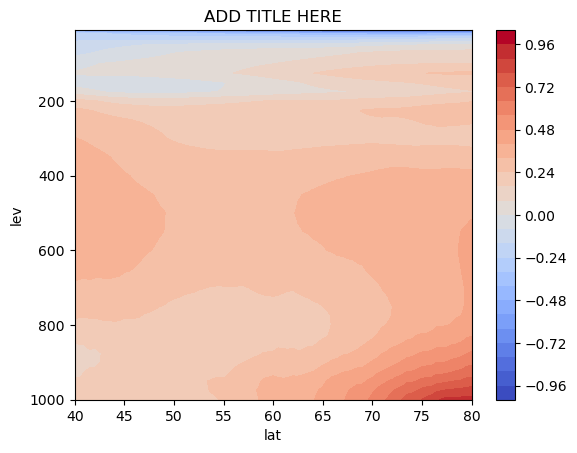

In [268]:
xr.plot.contourf(t_anom_da, x = 'lat', y = 'lev', levels = 30, yincrease=False, cmap = 'coolwarm')
plt.title("ADD TITLE HERE")

### Subsection 2.2: Arctic Amplification Time Series

- Arctic Amplification defined as the difference in 1000 hPa temperature anomalies (relative to 1979–2021 mean), between the Arctic (70–90°N) and mid-latitudes (30–60°N)
    - Note that this is updated from Francis & Vavrus' available data from 1948–2013 mean

- Analogous to Figure 2A

#### Read in pre-computed monthly and annual mean datasets

In [201]:
# Define the parent dir where annual temp data lives
# dir_seasonal_t = '/home11/grad/2021/cs436778/general-circulation/project/data/seasonal/'
dir_annual_t = '/home11/grad/2021/cs436778/general-circulation/project/data/annual/'
dir_monthly_t = '/home11/grad/2021/cs436778/general-circulation/project/data/monthly/'

# Define the years of data for Arctic Amplification Calculation
years = range(1979,2022)

leap = ['1980', '1984', '1988', '1992', '1996', '2000', '2004', '2008', '2012', '2016', '2020']

#### Define Functions 
For the mid-latitudes and the arctic, must calculate annual and seasonal means 1) by year and 2) as long-term climatologies over 43 years from 1979-2022

In [148]:
def latrange_mean(dataset, elev_p, latrange):
    """ 
    For each year, read in the seasonal dataset and subset by elevation and latitude range (ex: arctic and mid latitudes regions)
    Calculate the region's latitude-weighted mean temperature for each season
    """
    latrange = dataset.t.sel(lev=elev_p, lat = latrange)
    latrange_weights = np.cos(np.deg2rad(latrange.lat))
    latrange_mean = latrange.weighted(latrange_weights).mean(dim = 'lat')
    return latrange_mean
    
    
def add_to_dict(dict_name, key_name, val):
    """ 
    Append value to a specific key in dictionary if the key already exists
    Otherwise, if key doesn’t exist in dictionary, add a new key and its value to the dictionary 
    """
    if key_name in dict_name:
        if type(dict_name[key_name]) is not list:
            key_current_val = [dict_name[key_name]]
        else:
            key_current_val = dict_name[key_name]
        key_current_val.append(val)
        dict_name[key_name] = key_current_val
    else:
        dict_name[key_name] = val    
        
def yearly_monthly_means(dataset, dict_name):
    """
    For each season, track the year, season, and mean value (three keys)
    Returns a dictionary of the tracked data 
    """
    for month_num in range(1,13):
        month_val = dataset.sel(month = month_num).values.item()
        add_to_dict(dict_name, month_num, month_val)
        
def year_month_length(yr, dictname):
    """
    Identifies the length of day in a month or year depending on leap year
    Note: These lengths will be used for calculating seasonal and annual climatologies rather than using xarray's built in averaging over 'time.season' which is DJF rather than JFM
    """
    if yr in leap:
        add_to_dict(dictname, 'count_2', 29)
        add_to_dict(dictname, 'count_year', 366)
    else: 
        add_to_dict(dictname, 'count_2', 28)
        add_to_dict(dictname, 'count_year', 365)
    add_to_dict(dictname, 'count_1', 31)
    add_to_dict(dictname, 'count_3', 31)
    add_to_dict(dictname, 'count_4', 30)
    add_to_dict(dictname, 'count_5', 31)
    add_to_dict(dictname, 'count_6', 30)
    add_to_dict(dictname, 'count_7', 31)
    add_to_dict(dictname, 'count_8', 31)
    add_to_dict(dictname, 'count_9', 30)
    add_to_dict(dictname, 'count_10', 31)
    add_to_dict(dictname, 'count_11', 30)
    add_to_dict(dictname, 'count_12', 31)


def dict_month_data(plevel, lat_low, lat_high):
    """
    Create dictionary of temp data by month and year for a given latitude range and pressure level
    """
    new_dict = {}
    for year in years:
        
        # add year to dictionary
        year = str(year)
        add_to_dict(new_dict, 'year_name', year)
        
        # open datasets
        ds_year_month = xr.open_mfdataset(f"{dir_monthly_t}monthly_t_{year}.nc")
        ds_year = xr.open_mfdataset(f"{dir_annual_t}annual_t_{year}.nc")

        # subset datasets
        lat_avg_months = latrange_mean(ds_year_month, plevel, slice(lat_low,lat_high))
        lat_avg_year = latrange_mean(ds_year, plevel, slice(lat_low,lat_high))
        
        # add subsetted data to dictionary
        yearly_monthly_means(lat_avg_months, new_dict)
        add_to_dict(new_dict, 'annual', lat_avg_year.values.item())
        
        # add month length and year length to dictionary accounting for leap years
        year_month_length(year, new_dict)
            
    return new_dict

 
def seasonal_climatology(region_dict, months_ls):
    """ 
    Calculate seasonal climatologies, used for calculating anomalous temp
    Input regional dictionary of temps by month (e.g. arctic_dict made above) 
    Input list of month numbers to be averaged to create season (e.g. input list [1,2,3] to average Jan, Feb, Mar)
    Returns weighted average value (weighted by month length) and the length of season
    """
    month_values = region_dict[months_ls[0]] + region_dict[months_ls[1]] + region_dict[months_ls[2]]
    month_num_days = region_dict[f"count_{str(months_ls[0])}"] + region_dict[f"count_{str(months_ls[1])}"] + region_dict[f"count_{str(months_ls[2])}"]
    season_mean = np.average(month_values, weights = month_num_days)
    season_num_days = sum(month_num_days)
    return season_mean, season_num_days


def seasonal_anom(region_dict, months_ls, season_clim):
    """ 
    Create time series of temp anomalies by year & season 
    Input regional dictionary of temps 
    Input list of month numbers to be averaged to create season (e.g. input list [1,2,3] to average Jan, Feb, Mar)
    For each year, calculate the seasonal anomaly by averaging that season's months and then subtracting the seasonal climatology
    Returns timeseries list of seasonal temp anomalies from Winter 1979 through Fall 2021, seasonal weighted average value (weighted by month length) of season
    """
    season_t_ls = []
    for year_ind in range(0, len(region_dict['year_name'])):
        month_values = [region_dict[months_ls[0]][year_ind], region_dict[months_ls[1]][year_ind], region_dict[months_ls[2]][year_ind]]
        month_num_days = [region_dict[f"count_{str(months_ls[0])}"][year_ind], region_dict[f"count_{str(months_ls[1])}"][year_ind], region_dict[f"count_{str(months_ls[2])}"][year_ind]]
        season_mean = np.average(month_values, weights = month_num_days)
        season_t_ls.append(season_mean-season_clim)
    return season_t_ls

def annual_climatology(years_ls, plevel, lat_low, lat_high):
    """ 
    Calculate annual climatology for a given range of years, pressure level, and region (slice from lat_low to lat_high)
    """
    files_allyears = []
    for year in years_ls: 
        files_allyears.append(f"{dir_annual_t}annual_t_{year}.nc")

    ds_years = xr.open_mfdataset(files_allyears , chunks={'time':30*4, 'lev': 4}, parallel=True)

    latrange = ds_years.t.sel(lev=plevel, lat = slice(lat_low,lat_high))
    latrange_weights = np.cos(np.deg2rad(latrange.lat))
    latrange_mean = latrange.weighted(latrange_weights).mean(dim = 'lat')

    t_ann = latrange_mean.mean(dim=('year'))
    t_avg = t_ann.values.item()
    return t_avg

def annual_anom(region_dict, annual_clim):
    """ 
    Create time series of temp anomalies by year
    Input regional dictionary of temps
    Input annual climatology (relative temp for anomaly calc)
    For each year, calculate the annual anomaly by subtracting the seasonal climatology
    Returns timeseries list of seasonal temp anomalies from 1979 through 2021
    """
    annual_t_ls = []
    for year_ind in range(0, len(region_dict['year_name'])):
        annual_mean = region_dict['annual'][year_ind]
        annual_t_ls.append(annual_mean-annual_clim)
    return annual_t_ls


#### Create dictionaries holding monthly temperature from 1979 through 2022

In [51]:
midlat_dict_new = dict_month_data(1000, 30, 60)
arctic_dict_new = dict_month_data(1000, 70, 90)

#### Seasonal calculations

##### A) Seasonal climatologies

In [129]:
arctic_jfm_mean, arctic_jfm_len = seasonal_climatology(arctic_dict_new, [1,2,3])
midlat_jfm_mean, midlat_jfm_len = seasonal_climatology(midlat_dict_new, [1,2,3])

arctic_amj_mean, arctic_amj_len = seasonal_climatology(arctic_dict_new, [4,5,6])
midlat_amj_mean, midlat_amj_len = seasonal_climatology(midlat_dict_new, [4,5,6])

arctic_jas_mean, arctic_jas_len  = seasonal_climatology(arctic_dict_new, [7,8,9])
midlat_jas_mean, midlat_jas_len = seasonal_climatology(midlat_dict_new, [7,8,9])

arctic_ond_mean, arctic_ond_len  = seasonal_climatology(arctic_dict_new, [10,11,12])
midlat_ond_mean, midlat_ond_len = seasonal_climatology(midlat_dict_new, [10,11,12])

# Annual way 1
# arctic_annual_mean = np.average([arctic_jfm_mean, arctic_amj_mean, arctic_jas_mean, arctic_ond_mean], weights = [arctic_jfm_len, arctic_amj_len, arctic_jas_len, arctic_ond_len]) 
# midlat_annual_mean = np.average([midlat_jfm_mean, midlat_amj_mean, midlat_jas_mean, midlat_ond_mean], weights = [midlat_jfm_len, midlat_amj_len, midlat_jas_len, midlat_ond_len]) 

# Annual

##### B) Seasonal anomalies timeseries

In [154]:
arctic_jfm_anom = seasonal_anom(arctic_dict_new, [1,2,3], arctic_jfm_mean)
midlat_jfm_anom = seasonal_anom(midlat_dict_new, [1,2,3], midlat_jfm_mean)

arctic_amj_anom = seasonal_anom(arctic_dict_new, [4,5,6], arctic_amj_mean)
midlat_amj_anom = seasonal_anom(midlat_dict_new, [4,5,6], midlat_amj_mean)

arctic_jas_anom = seasonal_anom(arctic_dict_new, [7,8,9], arctic_jas_mean)
midlat_jas_anom = seasonal_anom(midlat_dict_new, [7,8,9], midlat_jas_mean)

arctic_ond_anom = seasonal_anom(arctic_dict_new, [10,11,12], arctic_ond_mean)
midlat_ond_anom = seasonal_anom(midlat_dict_new, [10,11,12], midlat_ond_mean)

#### Annual calculations

##### A) Annual climatology

In [155]:
arctic_ann_mean = annual_climatology(years, 1000, 70, 90)
midlat_ann_mean = annual_climatology(years, 1000, 30, 60)

##### B) Annual anomalies timeseries

In [156]:
arctic_ann_anom = annual_anom(arctic_dict_new, arctic_ann_mean)
midlat_ann_anom = annual_anom(midlat_dict_new, midlat_ann_mean)

#### Calculate Arctic Amplification (AA) time series by season & annually

In [173]:
winter = np.array(arctic_jfm_anom) - np.array(midlat_jfm_anom)
spring = np.array(arctic_amj_anom) - np.array(midlat_amj_anom)
summer = np.array(arctic_jas_anom) - np.array(midlat_jas_anom)
fall = np.array(arctic_ond_anom) - np.array(midlat_ond_anom)
annual = np.array(arctic_ann_anom) - np.array(midlat_ann_anom)


#### Plot Arctic Amplification Time Series

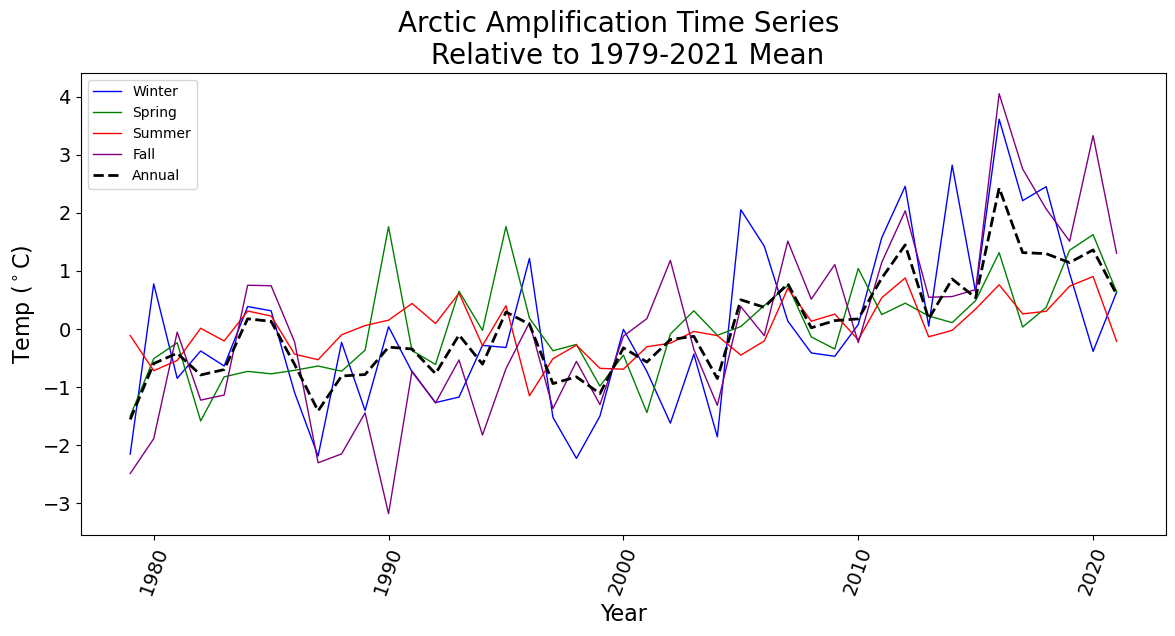

In [174]:
# Create figure of a particular size
fig = plt.figure(figsize=(14, 6))

# add plot
ax1 = fig.add_subplot(1, 1, 1)

# plot values
ax1.plot(years, winter, label='Winter', color='blue',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, spring, label='Spring', color='green',linewidth=1, markersize = 6) # , marker='o'
ax1.plot(years, summer, label='Summer', color='red',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, fall, label='Fall', color='purple',linewidth=1, markersize = 6) #, marker='o'
ax1.plot(years, annual, label='Annual', color='black',linewidth=2, linestyle='--', markersize = 6) #, marker='o'


ax1.set_title('Arctic Amplification Time Series \n Relative to 1979-2021 Mean', size = 20)
ax1.set_xlabel('Year', size = 16)
ax1.set_ylabel('Temp ($^\circ$C)', size = 16)
ax1.tick_params(axis='x', labelrotation = 70, labelsize=14)
ax1.tick_params(axis='y',  labelsize=14)

ax1.legend(loc='upper left')

#### Subset to 2017-2021 data for comparing to NYSM in next section


In [220]:
yrs_nysm = years[38:43]
winter_nysm = winter[38:43]
spring_nysm = spring[38:43]
summer_nysm = summer[38:43]
fall_nysm = fall[38:43]
annual_nysm = annual[38:43]

## Section 3: NY State Temp Anomalies using NY State Mesonet (NYSM) Data

### 3A: Read in NYSM data
- Data is saved locally as csv files for each day with file naming convention "20210815.csv"
    - Each day contains all sites with meteorological data saved out every 5 minutes
- Read in each day's dataframe and concatenate into one large dataframe containing all days/sites

#### Define paths and dates

In [2]:
# Set paths and the initial date of NYSM data
path = "/kt11/ktyle/mesonet/" # use your path

# Set initial date of data to read in
date_init = datetime.strptime('01-01-17', '%m-%d-%y')

# Set the end date of data to read in, also creating a "days_from_init" variable used for reading in all dates after init
date_end = datetime.strptime('09-14-22', '%m-%d-%y')
days_from_init = int((date_end - date_init).days)

#### Create list of files to read in
- Directory holds more files than just NYSM csv files so must create list of exactly which files to read in

In [3]:
# create list of strings in the form of "yyyymmdd" to be used for reading in csv datasets
def date_string(date_val):
    return f"{'{:04d}'.format(date_val.year)}{'{:02d}'.format(date_val.month)}{'{:02d}'.format(date_val.day)}"

dates = []
for x in range(0, days_from_init): 
    date = date_string(date_init + timedelta(days = x))
    dates.append(date)
    
# create list of all files to be read in using list of dates (as strings) as defined in previous cell
all_files = []
for day in dates:
    all_files.append(f"{path}{day}.csv")

#### Read in all data into one dataframe

In [4]:
%%time 

# for each csv file in list, read in the data as a dataframe and append dataframes to list "li"
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# concatenate all dataframes in list to get one large dataframe for each day
nysm_data = pd.concat(li, axis=0, ignore_index=True)

CPU times: user 2min 16s, sys: 38.7 s, total: 2min 55s
Wall time: 2min 57s


In [5]:
len(li)

2082

#### Subset dataframe to fields of interest only and rename columns


In [6]:
nysm_data = nysm_data[["station", "time", "temp_2m [degC]"]]
nysm_data = nysm_data.rename(columns={"temp_2m [degC]": "temp_2m[C]"})

In [7]:
# print(nysm_data.columns)
# print(nysm_data[["station", "time"]].nunique())
# print(126*599616)
# print(nysm_data.shape)

In [8]:
nysm_data.shape
nysm_data.head()

,station,time,temp_2m[C]
0,ADDI,2017-01-01 00:00:00 UTC,-0.8
1,ADDI,2017-01-01 00:05:00 UTC,-0.7
2,ADDI,2017-01-01 00:10:00 UTC,-0.5
3,ADDI,2017-01-01 00:15:00 UTC,-0.4
4,ADDI,2017-01-01 00:20:00 UTC,-0.2


#### Convert the large dataframe of mesonet data into xarray dataset with station and time as the coordinates
- Average by date so that there is one value for each site and date (rather than 288, every 5 mins, per day)
- Find each day's 15-day rolling average, centered around the date (i.e. includes the 7 days prior and after)

In [9]:
%%time

# set station and time to be indices of the df so that the conversion to xarray dataset makes them coordinates
nysm_df = nysm_data.set_index(["station", "time"]) 
print(nysm_data.shape)
# convert to dataset
nysm_ds = nysm_df.to_xarray()

# convert time coordinate of the dataset to datetime format
# NOTE: must be executed twice (last subcomment here by Vinod: https://stackoverflow.com/questions/62572678/xarray-coords-conversion-to-datetime64)
nysm_ds["time"] = pd.DatetimeIndex(nysm_ds["time"].values)
nysm_ds["time"] = pd.DatetimeIndex(nysm_ds["time"].values)

nysm_ds

(75070368, 3)
CPU times: user 1min 9s, sys: 6.95 s, total: 1min 16s
Wall time: 1min 16s


<xarray.Dataset>
Dimensions:     (station: 126, time: 599616)
Coordinates:
  * station     (station) object 'ADDI' 'ANDE' 'BATA' ... 'WHIT' 'WOLC' 'YORK'
  * time        (time) datetime64[ns] 2017-01-01 ... 2022-09-13T23:55:00
Data variables:
    temp_2m[C]  (station, time) float64 -0.8 -0.7 -0.5 -0.4 ... 14.0 13.9 13.9

#### Calculate averages by date so it's one temp per date instead of every 5 minutes

In [11]:
# get average value by day (removing hour/minute variable and leaving just one value per day)
ds = nysm_ds.groupby("time.date").mean("time", skipna=True)

# convert time coordinate of the dataset to datetime format
ds["date"] = pd.DatetimeIndex(ds["date"].values)
ds["date"] = pd.DatetimeIndex(ds["date"].values)

ds

/knight/anaconda_aug22/envs/aug22_env/lib/python3.10/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in true_divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


<xarray.Dataset>
Dimensions:     (station: 126, date: 2082)
Coordinates:
  * station     (station) object 'ADDI' 'ANDE' 'BATA' ... 'WHIT' 'WOLC' 'YORK'
  * date        (date) datetime64[ns] 2017-01-01 2017-01-02 ... 2022-09-13
Data variables:
    temp_2m[C]  (station, date) float64 0.126 -1.302 2.219 ... 18.88 20.68 17.11

# REMOVE?? Mover after, decided sequential is best
### 3B: Calculate each **day's** temperature average and standard deviation (e.g. **June 12th** has an average temp of XYZ with standard deviation of ABC)
- These average temperatures by day will be used to calculate the anomaly for each date from Jan 1 2017 - Sep 13, 2022
- The standard deviations will be used to calculate the "anomalous" days for those with 2 or more standard deviations away
- A note on how avaerages are calculated:
    - With only 6 years of NYSM data, it's not enough to average 6 years of June 12ths together to get the expected June 12th temperature. 
    - Instead, take the rolling 15 days around June 12th over all 6 years
        - E.g. June 12th avg temp = Avg( Avg(Jun5-Jun19 2017), Avg(Jun5-Jun19 2018), ... , Avg(Jun5-Jun19 2022) )
        - In other words, it's an average of 90 temperatures of a rolling 15-days around June 12th for 6 years
        - This method provides more data for averaging (compared to just 6 June 12th days) for less volatility in averaging

### 3B: Use xarray's .rolling function to calculate the avg and standard deviation of the 15-day rolling surrounding each *date*

- By date, calculate rolling average of 15 days around date, i.e. +/- 7 days before and after
- For example, Jun 12 2019 temperature avg and standard deviation includes Jun 5 2019 through Jun 19 2019
- Note that this function has a min_period parameter which is defaulted to the number of rolling days, which we're using 15. What this means is that all 15 days must be included (non-nan) in order to calculate that date's mean and standard deviation. 
    - The reasoning behind this is that otherwise, if lowering this threshold, we may include temps that are not symmetric arond the date. For example, if Jun 5 2019 through Jun 10 2019 were nan, the rolling-15 day average temp for Jun 12 2019 will not be calculated, set to nan. Jun 12 2019 will also not be included in temperature trend analyses (later in this notebook).
    - What this also means is that the tail ends, Jan 1 2017 - Jan 7 2017 and Sep 7 2022 - Sep 13 2022, will not be included in temp trend analyses because they do not have all the "surrounding" dates to calculate the 15-day rolling average.


In [26]:
rolling_avg = ds.rolling({"date":15}, center = True).mean() 
rolling_var = ds.rolling({"date":15}, center = True).var()

ds['rolling_temp_2m[C]_mean'] = rolling_avg['temp_2m[C]']
ds['rolling_temp_2m[C]_var'] = rolling_var['temp_2m[C]']

ds

<xarray.Dataset>
Dimensions:                  (station: 126, date: 2082)
Coordinates:
  * station                  (station) object 'ADDI' 'ANDE' ... 'WOLC' 'YORK'
  * date                     (date) datetime64[ns] 2017-01-01 ... 2022-09-13
Data variables:
    temp_2m[C]               (station, date) float64 0.126 -1.302 ... 17.11
    rolling_temp_2m[C]_mean  (station, date) float64 nan nan nan ... nan nan nan
    rolling_temp_2m[C]_var   (station, date) float64 nan nan nan ... nan nan nan

##### ***Optional Reference:*** To spot check that 15-day rolling average round dates worked as expected

In [27]:
# manual calc of 15day rolling avg
print(ds.sel(station = 'QUEE', date = slice('2017-04-19', '2017-05-03'))['temp_2m[C]'].mean().values.item())
# assigned value (from xarray's .rolling calc done prior)
print(ds.sel(station = 'QUEE', date = '2017-04-26')['rolling_temp_2m[C]_mean'].values.item())

# manual calc of 15day rolling avg
print(ds.sel(station = 'BATA', date = slice('2021-08-19', '2021-09-02'))['temp_2m[C]'].mean().values.item())
# assigned value (from xarray's .rolling calc done prior)
print(ds.sel(station = 'BATA', date = '2021-08-26')['rolling_temp_2m[C]_mean'].values.item())

13.900162037037036
13.900162037037035
22.569560185185185
22.56956018518515


##### Convert to dataframe and add other columns including "season"

In [28]:
df = ds.to_dataframe()
df.reset_index(inplace=True)

# add monthday column:
df['monthday'] = df['date'].astype(str).str[5:10]
df['month'] = df['date'].astype(str).str[5:7]
df['year'] = df['date'].astype(str).str[0:4]
season_list = []
months = df['month'].to_list()
for mo in months:
    if mo in ['01','02', '03']:
        season_list.append('JFM')
    elif mo in ['04','05', '06']:
        season_list.append('AMJ')
    elif mo in ['07','08', '09']:
        season_list.append('JAS')
    else:
        season_list.append('OND')
df['season'] = season_list
df

,station,date,temp_2m[C],rolling_temp_2m[C]_mean,rolling_temp_2m[C]_var,monthday,month,year,season
0,ADDI,2017-01-01,0.126042,NaN,NaN,01-01,01,2017,JFM
1,ADDI,2017-01-02,-1.302431,NaN,NaN,01-02,01,2017,JFM
2,ADDI,2017-01-03,2.219097,NaN,NaN,01-03,01,2017,JFM
3,ADDI,2017-01-04,1.353472,NaN,NaN,01-04,01,2017,JFM
4,ADDI,2017-01-05,-7.119792,NaN,NaN,01-05,01,2017,JFM
...,...,...,...,...,...,...,...,...,...
262327,YORK,2022-09-09,19.393403,NaN,NaN,09-09,09,2022,JAS
262328,YORK,2022-09-10,19.957639,NaN,NaN,09-10,09,2022,JAS
262329,YORK,2022-09-11,18.877431,NaN,NaN,09-11,09,2022,JAS
262330,YORK,2022-09-12,20.677083,NaN,NaN,09-12,09,2022,JAS


### 3C: Calculate each **day's** temperature average and standard deviation 
- Create a dataframe by month_day and station with temperature mean and standard deviation
- The average temperatures by day will be used to calculate the temp anomaly for each date from Jan 1 2017 - Sep 13, 2022
- The standard deviations by day will be used to calculate the "anomalous" days for those with 2 or more standard deviations away
- **Day** temperature averages and standard deviations can be calculated using the *date*-specific rolling 15-day statistics as calculated in section 3B above. 
    - Using "naive algorithm" - https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance - to calculate "aggregated" **day** variance by using the individual variances that we have calculated by *date*
- A note on the data used for **day** temp averages and standard deviations:
    - With only 6 years of NYSM data, it's not enough to average 6 years of June 12ths together to get the expected June 12th temperature. 
    - Instead, also take the rolling 15 days *around* June 12th over all 6 years
        - E.g. June 12th avg temp = Avg( Avg(Jun5-Jun19 2017), Avg(Jun5-Jun19 2018), ... , Avg(Jun5-Jun19 2022) )
        - In other words, it's an average of 90 temperatures of a rolling 15-days around June 12th for 6 years
        - This method provides more data for averaging for less volatility in averaging
        

In [55]:
# Subset df to only the necessary columns
df_sub = df[['station', 'monthday', 'rolling_temp_2m[C]_mean', 'rolling_temp_2m[C]_var']]

# Add a column [sum (x_i)]^2 needed for calculating standard dev of temp by day
df_sub['sum_xi_sq'] = (df_sub['rolling_temp_2m[C]_var'] + (df_sub['rolling_temp_2m[C]_mean'])**2)*15

# Group data by monthday and station and do additional calculations with those groupings needed for final mean and std calc by day
df_day = df_sub.groupby(['monthday', 'station']).agg({'rolling_temp_2m[C]_mean':'mean', 'sum_xi_sq':'sum'}) # once I have multiple cols in my df should be able to do different things to each
df_day.reset_index(inplace=True)
df_day.rename(columns = {'rolling_temp_2m[C]_mean': 'mean','sum_xi_sq': 'sum' , 'included': 'ct'}, inplace = True)
df_ct = df_sub.groupby(['monthday', 'station']).agg({'rolling_temp_2m[C]_mean':'count'}) # once I have multiple cols in my df should be able to do different things to each
df_ct.reset_index(inplace=True)
df_day['ct'] = df_ct['rolling_temp_2m[C]_mean']
df_day['std'] = np.sqrt(df_day['sum']/(15*df_day['ct']) - (df_day['mean'])**2)

# Subset final day statistics to columns of interest only
df_day = df_day[['monthday', 'station', 'mean', 'std']]
df_day

/tmp/ipykernel_1541661/1931415257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['sum_xi_sq'] = (df_sub['rolling_temp_2m[C]_var'] + (df_sub['rolling_temp_2m[C]_mean'])**2)*15


,monthday,station,mean,std
0,01-01,ADDI,-3.029796,6.271430
1,01-01,ANDE,-3.751347,6.469757
2,01-01,BATA,-2.337212,6.264545
3,01-01,BEAC,-0.575382,5.941292
4,01-01,BELD,-3.463532,6.238018
...,...,...,...,...
46111,12-31,WFMB,-6.580759,7.254328
46112,12-31,WGAT,-2.908614,4.019185
46113,12-31,WHIT,-4.145318,7.129448
46114,12-31,WOLC,0.916832,3.360745


### 3D: Create final dataframe with ***temperature anomalies*** and ***standard deviations away from mean***  
- For each *date*, from 1/1/17-9/13/22, subtract the mean temperature for that **day** as calculated in 3C
    - For example, in 3C we calculated **June 12** temp mean and standard deviation. For each *date* June 12 2017, June 12 2018, June 12 2019, June 12 2020, June 12 2021, June 12 2022, subtract off the **June 12** temp mean to get the anomaly temp for that date, and calculate the number of standard deviations away from mean
- A few notes on the statistics: 
    - The mean temp anomaly (by **day**) is 0
    - The standard deviation of temp anomaly is the same as the standard deviation of temperature. We'll calculate **standard deviations away** using temperature rather than temperature anomaly 
        - See example at end of this section confirming all calcluations with an example from scratch

In [166]:
# Make final dataframe by DATE with the DAY'S mean and std as calculated above (by merging df)
df_final = df[['date', 'year', 'month', 'season', 'monthday', 'station', 'temp_2m[C]']].merge(df_agr[['monthday', 'station', 'mean', 'std']], how='inner', left_on = ['monthday', 'station'], right_on=['monthday', 'station'])
df_final.rename(columns = {'mean':'temp_2m[C]_mean', 'std':'temp_2m[C]_std'}, inplace = True)

df_final['temp_2m[C]_anomaly'] = df_final['temp_2m[C]'] - df_final['temp_2m[C]_mean']
df_final['stds_away_precise'] = (abs(df_final['temp_2m[C]_anomaly'])/df_final['temp_2m[C]_std'])
df_final['stds_away'] = np.ceil(df_final['stds_away_precise'])

df_final['std_bins'] = np.minimum(df_final['stds_away'], 3)
df_final['std_consec'] = np.minimum(df_final['stds_away'], 2)
df_final['std_consec'].loc[df_final['std_consec'] == 2.0] = 'Y'
df_final['std_consec'].loc[df_final['std_consec'] == 1.0] = 'N'

df_final

/tmp/ipykernel_1541661/3626337795.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['std_consec'].loc[df_final['std_consec'] == 2.0] = 'Y'


,date,year,month,season,monthday,station,temp_2m[C],temp_2m[C]_mean,temp_2m[C]_std,temp_2m[C]_anomaly,stds_away_precise,stds_away,std_bins,std_consec
0,2017-01-01,2017,01,JFM,01-01,ADDI,0.126042,-3.029796,6.271430,3.155838,0.503209,1.0,1.0,N
1,2018-01-01,2018,01,JFM,01-01,ADDI,-16.729861,-3.029796,6.271430,-13.700065,2.184520,3.0,3.0,Y
2,2019-01-01,2019,01,JFM,01-01,ADDI,4.503125,-3.029796,6.271430,7.532921,1.201149,2.0,2.0,Y
3,2020-01-01,2020,01,JFM,01-01,ADDI,-2.948264,-3.029796,6.271430,0.081532,0.013001,1.0,1.0,N
4,2021-01-01,2021,01,JFM,01-01,ADDI,-4.305903,-3.029796,6.271430,-1.276106,0.203479,1.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262327,2018-12-31,2018,12,OND,12-31,YORK,-0.008333,-1.556117,6.352793,1.547784,0.243638,1.0,1.0,N
262328,2019-12-31,2019,12,OND,12-31,YORK,2.273264,-1.556117,6.352793,3.829381,0.602787,1.0,1.0,N
262329,2020-12-31,2020,12,OND,12-31,YORK,1.974306,-1.556117,6.352793,3.530423,0.555728,1.0,1.0,N
262330,2021-12-31,2021,12,OND,12-31,YORK,5.020139,-1.556117,6.352793,6.576256,1.035176,2.0,2.0,Y


##### ***Optional Reference***: Spot check a mean and standard deviation calculation
Note: this is an example with only 5 years of data to ensure that calculations work for any number of years of included data

In [56]:
print("Calculated in final_df above: \n")
print(df_agr[(df_agr['station'] =='BATA') & (df_agr['monthday'] == '05-07')])

# Calculating from scratch with original dataset

print("\n Confirming calculation with an example from scratch with original dataset")

# Subset data for 15 rolling days around 5/7 for years where all 15 days are present (i.e. in the years_included list above)
bata_0507 = df[(df['station'] =='BATA') & (df['monthday'] >= '04-30') & (df['monthday'] <= '05-14') & df['year'].isin(years_included)]

# find years where rolling averages have been calculated
years_included = df[(df['station'] =='BATA') & (df['monthday'] == '05-07') & (~df['rolling_temp_2m[C]_mean'].isna())]['year'].to_list()
print(f"years included {years_included}")

avg_temp = np.mean(bata_0507['temp_2m[C]'])
std_temp = np.std(bata_0507['temp_2m[C]'], ddof = 0)

# and check that this is equivalent view of doing with anomalies rather than temps
bata_0507_anom = bata_0507['temp_2m[C]'] - np.mean(bata_0507['temp_2m[C]'])
avg_anom = np.mean(bata_0507_anom) # should be 0!
std_anom = np.std(bata_0507_anom, ddof = 0)

print("\n Check that everything is as expected! \n")
print(f"subset orig df and avg temps: {avg_temp} .. should align w/ mean in final_df ")
print(f"subset orig df, calc anomalies, and avg anomalies: {avg_anom} .. should be 0!")
print(f"subset orig df and std temps: {std_temp} .. should align w/ std in final_df")
print(f"subset orig df, calc anomalies, and std anomalies: {std_anom} .. should be same as above and final_df")

Calculated in final_df above: 

      monthday station     mean       std
16004    05-07    BATA  9.84204  4.383145

 Confirming calculation with an example from scratch with original dataset
years included ['2017', '2018', '2019', '2020', '2021']

 Check that everything is as expected! 

subset orig df and avg temps: 9.84204029936672 .. should align w/ mean in final_df 
subset orig df, calc anomalies, and avg anomalies: 3.611925573447176e-15 .. should be 0!
subset orig df and std temps: 4.383144843510746 .. should align w/ std in final_df
subset orig df, calc anomalies, and std anomalies: 4.383144843510747 .. should be same as above and final_df


In [165]:
df_final

,date,year,month,season,monthday,station,temp_2m[C],temp_2m[C]_mean,temp_2m[C]_std,temp_2m[C]_anomaly,stds_away_precise,stds_away,std_bins,std_consec
0,2017-01-01,2017,01,JFM,01-01,ADDI,0.126042,-3.029796,6.271430,3.155838,0.503209,1.0,1.0,N
1,2018-01-01,2018,01,JFM,01-01,ADDI,-16.729861,-3.029796,6.271430,-13.700065,2.184520,3.0,3.0,Y
2,2019-01-01,2019,01,JFM,01-01,ADDI,4.503125,-3.029796,6.271430,7.532921,1.201149,2.0,2.0,Y
3,2020-01-01,2020,01,JFM,01-01,ADDI,-2.948264,-3.029796,6.271430,0.081532,0.013001,1.0,1.0,N
4,2021-01-01,2021,01,JFM,01-01,ADDI,-4.305903,-3.029796,6.271430,-1.276106,0.203479,1.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262327,2018-12-31,2018,12,OND,12-31,YORK,-0.008333,-1.556117,6.352793,1.547784,0.243638,1.0,1.0,N
262328,2019-12-31,2019,12,OND,12-31,YORK,2.273264,-1.556117,6.352793,3.829381,0.602787,1.0,1.0,N
262329,2020-12-31,2020,12,OND,12-31,YORK,1.974306,-1.556117,6.352793,3.530423,0.555728,1.0,1.0,N
262330,2021-12-31,2021,12,OND,12-31,YORK,5.020139,-1.556117,6.352793,6.576256,1.035176,2.0,2.0,Y


### 3E Temperature Anomalies Time Series

#### Create dataframe with warm and cool temperature anomalies by month for timeseries plot

In [251]:
df_for_measuring

,year,month,temp_2m[C]_anomaly,abs_anom,warm_anom,cool_anom
0,2017,01,3.155838,3.155838,3.155838,0.000000
1,2018,01,-13.700065,13.700065,0.000000,13.700065
2,2019,01,7.532921,7.532921,7.532921,0.000000
3,2020,01,0.081532,0.081532,0.081532,0.000000
4,2021,01,-1.276106,1.276106,0.000000,1.276106
...,...,...,...,...,...,...
262327,2018,12,1.547784,1.547784,1.547784,0.000000
262328,2019,12,3.829381,3.829381,3.829381,0.000000
262329,2020,12,3.530423,3.530423,3.530423,0.000000
262330,2021,12,6.576256,6.576256,6.576256,0.000000


In [315]:
def df_to_plot(df_input):
    """
    Return dataframe holding monthly averages for plotting
    """
    # First subset dataframe to include only columns of interest, add abs value of anomaly and warm and cool anomaly columns
    df_for_measuring = df_input[['year', 'month', 'temp_2m[C]_anomaly']]
    df_for_measuring = df_for_measuring.dropna()#[(~df_for_measuring['temp_2m[C]_anomaly'].isna()) & (~df_for_measuring['temp_2m[C]_anomaly'].isna())]
    df_for_measuring['abs_anom'] = abs(df_for_measuring['temp_2m[C]_anomaly'])
    df_for_measuring['warm_anom'] = np.maximum(df_for_measuring['temp_2m[C]_anomaly'], 0)
    df_for_measuring['cool_anom'] = abs(np.minimum(df_for_measuring['temp_2m[C]_anomaly'], 0))
    
    # Create dataframe for plotting, first add column for total anomaly 
    df_forplot = df_for_measuring[['year', 'month', 'temp_2m[C]_anomaly']].groupby(['year', 'month']).mean()
    df_forplot.reset_index(inplace=True)
    
    # Add column for mean absolute value anomaly (magnitudes of anomalies regardless of warm/cool)
    abs_anom = df_for_measuring[['year', 'month', 'abs_anom']].groupby(['year', 'month']).mean()
    abs_anom.reset_index(inplace=True)
    df_forplot['abs_anom'] = abs_anom['abs_anom']
    
    # Add column for warm anomaly
    warm_subset =  df_for_measuring[df_for_measuring['warm_anom']>0]
    warm_anom = warm_subset[['year', 'month', 'warm_anom']].groupby(['year', 'month']).mean()
    warm_anom.reset_index(inplace=True)
    df_forplot['warm_anom'] = warm_anom['warm_anom']
    
    # Add column for cool anomaly
    cool_subset = df_for_measuring[df_for_measuring['cool_anom']>0]
    cool_anom = cool_subset[['year', 'month', 'cool_anom']].groupby(['year', 'month']).mean()
    cool_anom.reset_index(inplace=True)
    df_forplot['cool_anom'] = cool_anom['cool_anom']

    # Calculate the correlation between magnitudes of warm and cool anomalies
    cor_warm_cool_anom = df_forplot['warm_anom'].corr(df_forplot['cool_anom'])
    
    # Add yearmo column
    df_forplot['yearmo'] = df_forplot['year']+df_forplot['month']
    
    # For tracking, count the nans and repalce with 0. Only shows up w/ nans for cool and warm anom calcs when there arent any in a given month by site
    #print(df_forplot.isna().sum())
    df_forplot = df_forplot.fillna(0) 
    
    return df_forplot

def linear_stats(df_input):
    """ 
    Calculate correlation between warm and cool temp anomaly magnitudes
    Calculate trend slope of temp anomalies with time. Repeat for absolute value, and warm and cool anomalies
    """
    
    corr_warm_cool = df_input['warm_anom'].corr(df_input['cool_anom'])
    
    x = np.array(range(0, len(df_input['yearmo'])))
        
    y_anom_time = np.array(df_input['temp_2m[C]_anomaly'])
    # y_anom_time = y_anom_time[~np.isnan(y_anom_time)]
    m_anom_time, b_anom_time = np.polyfit(x, y_anom_time, 1) 
    
    y_abs_time = np.array(df_input['abs_anom'])
    # y_abs_time = y_abs_time[~np.isnan(y_abs_time)]
    m_abs_time, b_abs_time = np.polyfit(x, y_abs_time, 1) 
    
    y_warm_time = np.array(df_input['warm_anom'])
    # y_warm_time = y_warm_time[~np.isnan(y_warm_time)]
    m_warm_time, b_warm_time = np.polyfit(x, y_warm_time, 1)
    
    y_cool_time = np.array(df_input['cool_anom'])
    # y_cool_time = y_cool_time[~np.isnan(y_cool_time)]
    m_cool_time, b_cool_time = np.polyfit(x, y_cool_time, 1) 

    return  corr_warm_cool, m_warm_time, m_cool_time, m_anom_time, m_abs_time



In [278]:
cw, t, at, w, c  = linear_stats(df_out)

at

-0.009931708650304943

In [311]:
df_out = df_to_plot(df_final)
df_out
df_out.isnull().values.any()

year                  0
month                 0
temp_2m[C]_anomaly    0
abs_anom              0
warm_anom             0
cool_anom             0
yearmo                0
dtype: int64


False

In [312]:
dfsome = df_final[df_final['station']== 'WALL']
df_someout = df_to_plot(dfsome)
df_someout
df_someout.isnull().values.any()

year                  0
month                 0
temp_2m[C]_anomaly    0
abs_anom              0
warm_anom             1
cool_anom             0
yearmo                0
dtype: int64


False

In [299]:
df_someout

,year,month,temp_2m[C]_anomaly,abs_anom,warm_anom,cool_anom,yearmo
0,2017,02,10.583700,10.583700,10.583700,5.151698,201702
1,2017,03,-2.304667,5.007420,4.654742,2.764983,201703
2,2017,04,2.242467,3.164128,3.243957,2.892186,201704
3,2017,05,-0.889105,3.589119,5.978601,3.025802,201705
4,2017,06,-0.120752,3.106770,3.199306,2.576709,201706
...,...,...,...,...,...,...,...
63,2022,05,1.128795,2.695577,3.119882,2.015883,202205
64,2022,06,-0.858865,1.828978,1.455170,1.325711,202206
65,2022,07,0.451559,1.563446,1.735143,1.755633,202207
66,2022,08,1.261680,2.167813,2.311180,0.706934,202208


#### Site specific statistics
Gather bulk statistics by site for 1) trends over time for temp anomalies and 2) correlation of warm and cool anomalies

In [318]:
site_stats = []

sites = df_final['station'].unique()
for site in sites:
    df_site = df_final[(df_final['station'] == site)]
    df_site = df_site.dropna()
    df_out = df_to_plot(df_site)
    corr_warm_cool, trend_t_time, trend_abst_time, trend_warm_time, trend_cool_time  = linear_stats(df_out)
    site_stats.append((site, corr_warm_cool, trend_t_time, trend_abst_time, trend_warm_time, trend_cool_time))


df_site_trends = pd.DataFrame(site_stats, columns = ['site', 'correl_warm_cool', 'trend_time_t_anom', 'trend_time_abst_anom', 'trend_time_warmt_anom', 'trend_time_coolt_anom'])

df_site_trends.sort_values('trend_time_t_anom')

,site,correl_warm_cool,trend_time_t_anom,trend_time_abst_anom,trend_time_warmt_anom,trend_time_coolt_anom
112,WALL,0.583327,-0.017411,-0.011170,0.009929,-0.014068
73,OLEA,0.445000,-0.016191,-0.007223,0.004442,-0.013914
98,SOME,0.342731,-0.016016,-0.019833,0.001231,-0.020453
53,HARP,0.375498,-0.015663,-0.003410,0.007300,-0.011020
89,ROXB,0.426274,-0.015383,-0.009306,0.007691,-0.012506
...,...,...,...,...,...,...
16,BUFF,0.376965,0.000277,-0.012651,0.017985,-0.008200
38,EAUR,0.446306,0.000343,-0.006942,0.013057,-0.004788
9,BKLN,0.502316,0.001468,-0.013608,0.013617,-0.007512
82,PISE,0.481011,0.001766,-0.004611,0.011889,-0.002743


### 3E: Count of Anomalous Days - Bar Plot

In [62]:
# Define seasons list for looping at various parts
seasons = ['JFM', 'AMJ', 'JAS', 'OND']

In [80]:
g = df_final[['year', 'std_bins']].groupby('std_bins').year.value_counts().unstack(0).reset_index()

In [81]:
y = df_final[['year', 'season', 'std_bins']][df_final['season'] == 'JFM'].groupby('std_bins').year.value_counts().unstack(0).reset_index()

In [101]:
y.columns

Index(['year', 1.0, 2.0, 3.0], dtype='object', name='std_bins')

In [102]:
y[1.0]

0    6037
1    7769
2    7599
3    8260
4    8651
5    6640
Name: 1.0, dtype: int64

In [118]:
def anom_ct(seas):
    """ 
    Plotting function takes in string season or "Annually" and plots the bar chart counting the anomalous days
    """
    if seas == 'Annually':  
        std1 = df_final[['year', 'std_bins']].groupby('std_bins').year.value_counts().unstack(0).reset_index()
    else: 
        std1 = df_final[['year', 'season', 'std_bins']][df_final['season'] == seas].groupby('std_bins').year.value_counts().unstack(0).reset_index()
    
    std1 = std1.rename_axis(None, axis=1)
    std1['Total'] = std1[1.0] + std1[2.0] + std1[3.0]

    std1['Non_anomalous_days'] = (std1[1.0]/std1['Total'])*100
    std1['Anomalous_days_within_2_standard_deviations'] = (std1[2.0]/std1['Total'])*100
    std1['Anomalous_days_3_or_more_standard_deviations'] = (std1[3.0]/std1['Total'])*100
    
    # reduce df before plotting to remove warning
    std2 = std1[['year', 'Non_anomalous_days', 'Anomalous_days_within_2_standard_deviations', 'Anomalous_days_3_or_more_standard_deviations']]

    plot = std2.plot(x='year', 
                     y = ['Non_anomalous_days', 'Anomalous_days_within_2_standard_deviations', 'Anomalous_days_3_or_more_standard_deviations'], 
                     kind='bar', 
                     ylabel = '% of total days',
                     stacked=True, 
                     title=f'Anomalous Days as % of Total Days \n {seas}')


    plot.legend(loc="lower right")

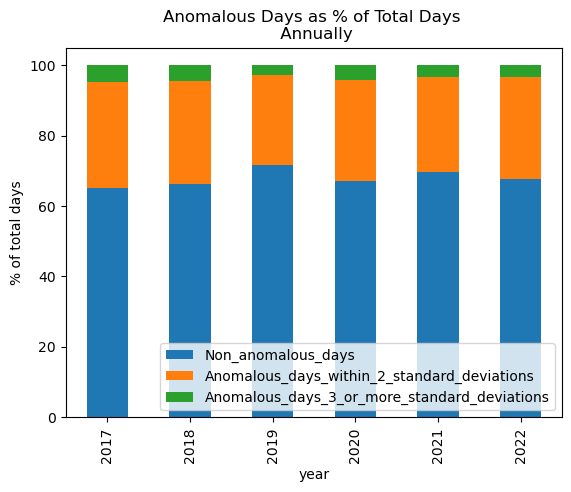

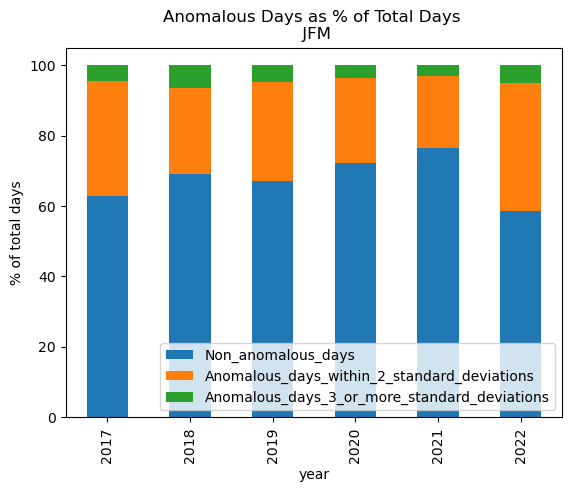

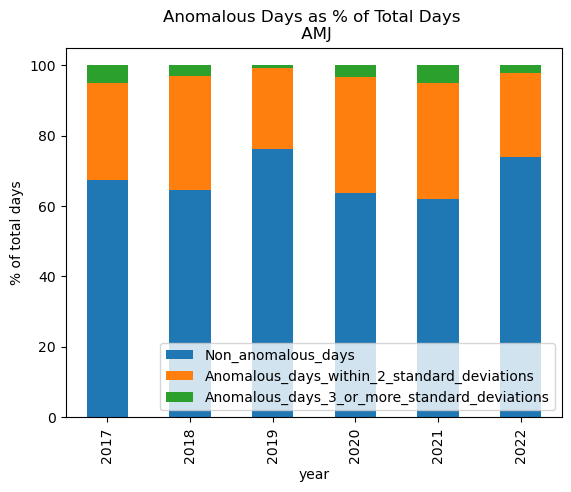

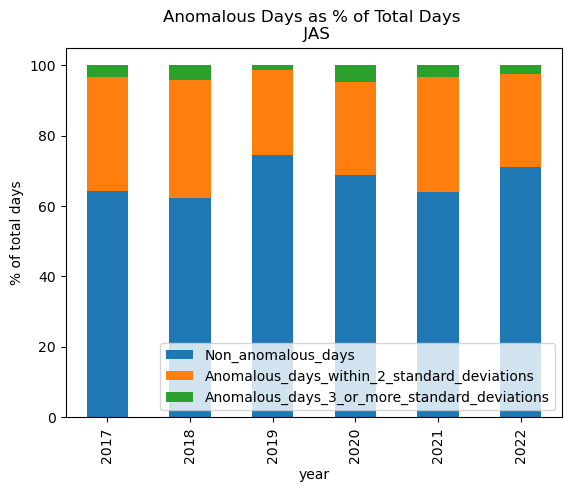

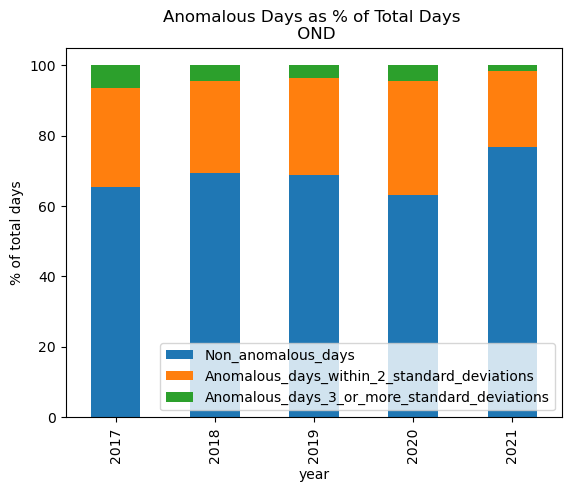

In [119]:
anom_ct('Annually')

for season in seasons:
    anom_ct(season)

/tmp/ipykernel_1541661/1122829689.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std1['Total'] = std1.sum(axis=1)


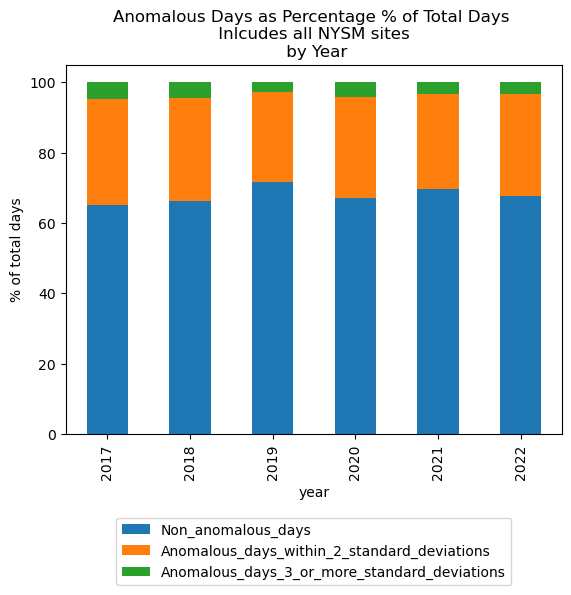

In [59]:
# FINAL PLOT Year
def anom_ct():
    std1 = df_final.groupby('std_bins').year.value_counts().unstack(0).reset_index()
    std1 = std1.rename_axis(None, axis=1)
    std1['Total'] = std1.sum(axis=1)

    # std1['Total'] = std1.sum(axis=0)

    std1['Non_anomalous_days'] = (std1[1.0]/std1['Total'])*100
    std1['Anomalous_days_within_2_standard_deviations'] = (std1[2.0]/std1['Total'])*100
    std1['Anomalous_days_3_or_more_standard_deviations'] = (std1[3.0]/std1['Total'])*100

    plot = std1.plot(x='year', 
                     y = ['Non_anomalous_days', 'Anomalous_days_within_2_standard_deviations', 'Anomalous_days_3_or_more_standard_deviations'], 
                     kind='bar', 
                     ylabel = '% of total days',
                     stacked=True, 
                     title=f'Anomalous Days as Percentage % of Total Days \n Inlcudes all NYSM sites \n by Year')


    plot.legend(loc="upper center", bbox_to_anchor=(0.5,0), borderaxespad=6)
    plt.savefig(f'/home11/grad/2021/cs436778/general-circulation/project/data/barplot_year.png')

for season in seasons:
    anom_ct(season)

___

## Summary

Paragraph